# Projeto Final
## Edmur Cristóforo Neto - 12558492

Neste projeto vamos avaliar se é possível realizar a predição do preço justo de um carro, apenas utilizando técnicas de ciêncida de dados e uma base de dados de vendas de carros.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/car%20data.csv'

df = pd.read_csv(url)

print(df.head())

df.to_csv('dados_extraidos.csv', index=False)


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


Na base de dados carregada, podemos observar diversas características dos carros, tais como:

- Nome;
- Ano;
- Preço de Venda;
- Preço Presente (Tabela FIPE);
- Quilometragem;
- Tipo de Combustível;
- Tipo de Vendedor;
- Tipo de Câmbio;
- Quantidade de Proprietários

Abaixo, exploramos mais a respeito das informações e aplicamos técnicas para tentar prever a coluna (Preço de Venda)

In [3]:
print(df.isna().sum())
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


Vemos que não há valores não preenchidos.

In [4]:
df.head(20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


Agora com os dados em mãos podemos realizar o tratamento e a exploração dos mesmos.

A primeira coisa que podemos notar é a escala dos preços, acredito que estão representando um preço em milhares de dólares. Além disso, vamos verificar se existem outliers entre os preços dos carros que possam prejudicar os modelos.

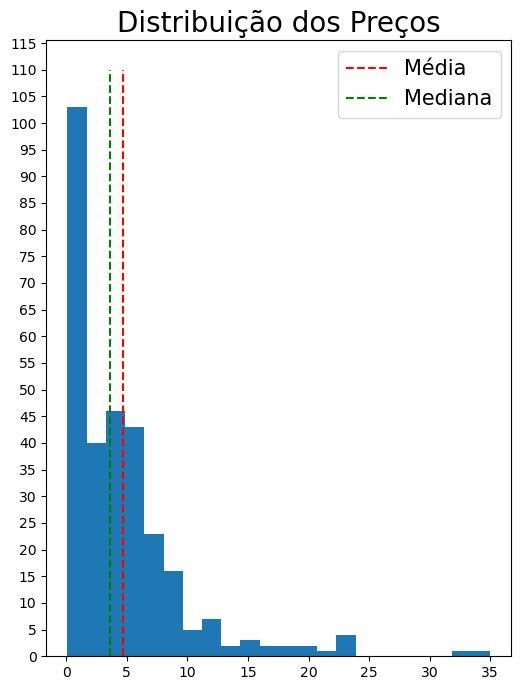

In [24]:
mean_price = df["Selling_Price"].mean()
median_price = df["Selling_Price"].median()
y_mean = np.arange(0,115,5)
x_mean = len(y_mean)*[mean_price]
y_median = np.arange(0,115,5)
x_median = len(y_median)*[median_price]


plt.figure(figsize=(6,8))
plt.hist(df["Selling_Price"], bins=22 )
plt.plot(x_mean, y_mean, "--", color="red", label = "Média")
plt.plot(x_median, y_median, "--", color="green", label = "Mediana")
plt.legend(fontsize=15)
plt.title("Distribuição dos Preços", fontsize=20)
plt.yticks(np.arange(0, 120, 5))
plt.show()

A média está um pouco afastada da mediana, o que pode indicar a presença de alguns valores que extrapolam um limite ideal. Podemos considerar este limite máximo como sendo acima do 3º Quartil, identificamos estes valores a partir do boxplot.

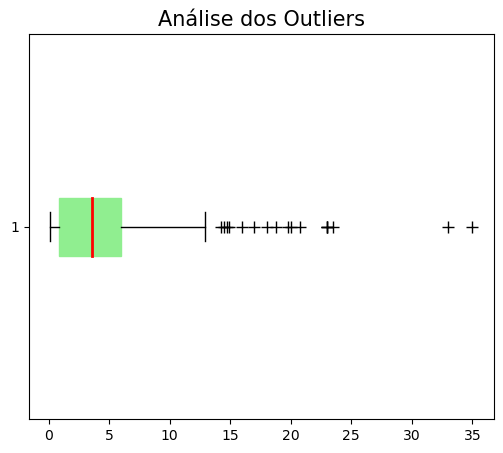

In [60]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))

bplot = ax.boxplot(df["Selling_Price"],
                     vert=False,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     )  # will be used to label x-ticks
ax.set_title('Análise dos Outliers', fontsize = 15)

plt.setp(bplot["boxes"], color="lightgreen")
plt.setp(bplot["fliers"], color="red", marker="+", markersize=9)
plt.setp(bplot["medians"], color="red", linewidth=2)

plt.grid(False)

plt.show()

In [76]:
Q3 = np.quantile(df["Selling_Price"], q=0.75)
Q1 = np.quantile(df["Selling_Price"], q=0.25)
IQR = Q3 - Q1
Lim_max = Q3 + 1.5*IQR

qnt_outlier = df[df["Selling_Price"] > Lim_max]

print(f"Existem {qnt_outlier.shape[0]} outliers, com valores de preços maiores de {Lim_max:3f}")

Existem 17 outliers, com valores de preços maiores de 13.650000


Para não prejudicar o modelo, um dos ajustes possíveis é a exclusão destes valores.

In [5]:

carros = df["Car_Name"].value_counts()

print(carros)

city                 26
corolla altis        16
verna                14
fortuner             11
brio                 10
                     ..
Honda Dream Yuga      1
omni                  1
Bajaj Avenger 150     1
Yamaha FZ S           1
alto 800              1
Name: Car_Name, Length: 98, dtype: int64


Quanto a coluna dos nomes dos carros, existem muitos carros no conjunto, sendo assim, seria difícil conseguir encontrar um padrão para esta coluna. A princípio, é uma coluna que pode ser excluída. 

In [6]:
anos = df["Year"].value_counts()
print(anos)

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2005     4
2006     4
2003     2
2007     2
2004     1
2018     1
Name: Year, dtype: int64


In [7]:
media_preço_anos = df.groupby("Year")["Selling_Price"].mean()

print(media_preço_anos)


Year
2003    1.300000
2004    1.500000
2005    2.487500
2006    1.437500
2007    0.160000
2008    1.002857
2009    2.816667
2010    5.262667
2011    2.375263
2012    3.841304
2013    3.540909
2014    4.762105
2015    5.927049
2016    5.213200
2017    6.209143
2018    9.250000
Name: Selling_Price, dtype: float64


Quanto a coluna dos anos dos carros, vemos que não uma certa correlação direta com o preço, mas pode ser uma informação importante em conjunto com outros dados.

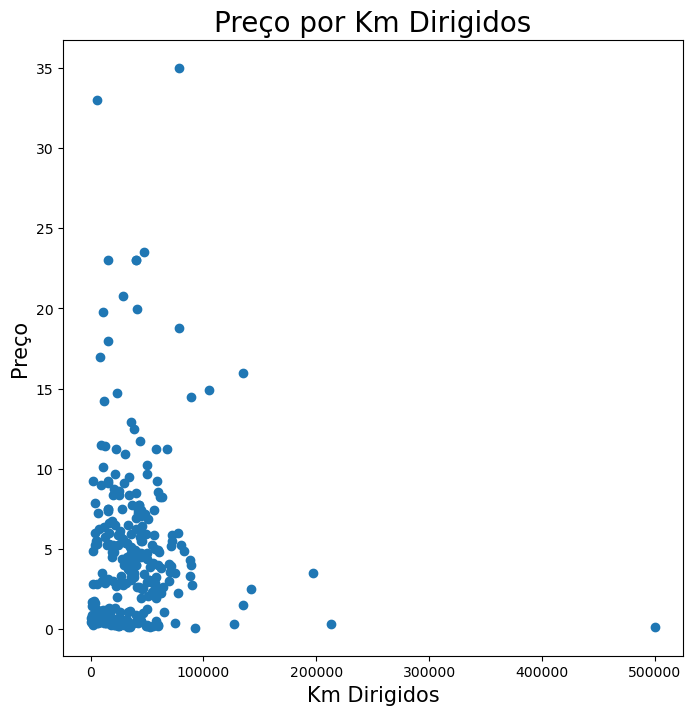

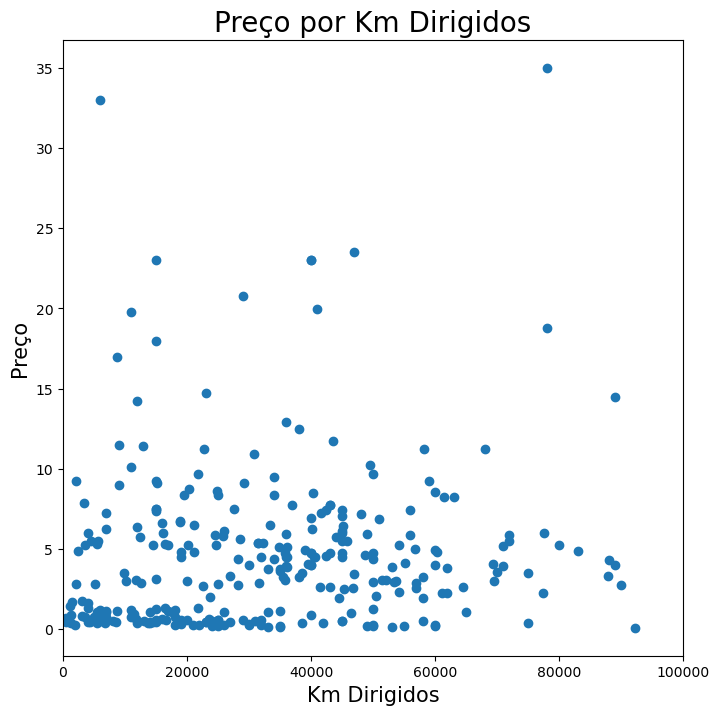

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(df["Kms_Driven"], df["Selling_Price"] )
plt.title("Preço por Km Dirigidos", fontsize=20)
plt.xlabel("Km Dirigidos", fontsize=15)
plt.ylabel("Preço", fontsize=15)
plt.show()

plt.figure(figsize=(8,8))
plt.scatter(df["Kms_Driven"], df["Selling_Price"] )
plt.title("Preço por Km Dirigidos", fontsize=20)
plt.xlabel("Km Dirigidos", fontsize=15)
plt.ylabel("Preço", fontsize=15)
plt.xlim((0, 100000))
plt.show()



Vemos que a informação da quilometragem por si só não representa um padrão para os preços dos carros.

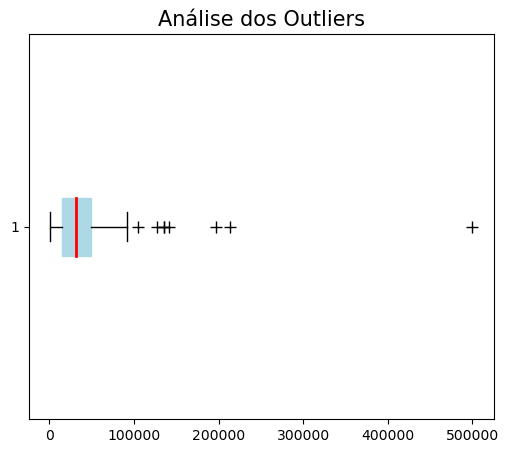

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))

bplot = ax.boxplot(df["Kms_Driven"],
                     vert=False,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     )  # will be used to label x-ticks
ax.set_title('Análise dos Outliers', fontsize = 15)

plt.setp(bplot["boxes"], color="lightblue")
plt.setp(bplot["fliers"], color="red", marker="+", markersize=9)
plt.setp(bplot["medians"], color="red", linewidth=2)

plt.grid(False)

plt.show()

Ainda quanto a quilometragem, vemos que um tratamento possível é a exclusão de alguns outliers que não representam tanta significância ao modelo.

In [80]:
Q3 = np.quantile(df["Kms_Driven"], q=0.75)
Q1 = np.quantile(df["Kms_Driven"], q=0.25)
IQR = Q3 - Q1
Lim_max = Q3 + 1.5*IQR

qnt_outlier = df[df["Kms_Driven"] > Lim_max]

print(f"Existem {qnt_outlier.shape[0]} outliers, com valores de quilometragem maiores de {Lim_max:3f}")

Existem 7 outliers, com valores de quilometragem maiores de 97979.375000


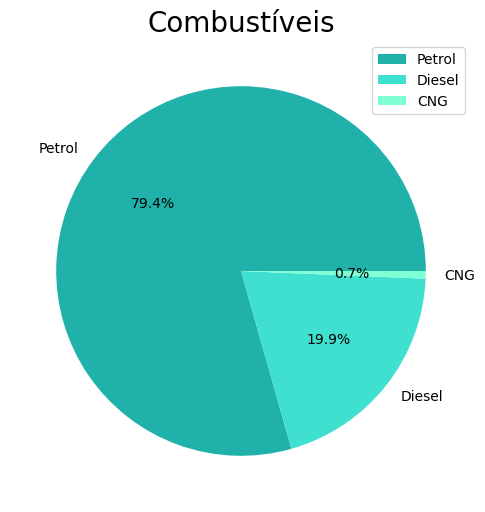

In [10]:
classes_fuel = df["Fuel_Type"].value_counts()
fuels = classes_fuel.index

color = ["lightseagreen", "turquoise", "aquamarine"]


plt.figure(figsize=(6,6))
plt.pie(classes_fuel, labels=fuels,autopct="%1.1f%%", colors=color)
plt.title("Combustíveis", fontsize = 20)
plt.legend()
plt.show()


Vemos que existem poucos carros no data frame com o combustível do tipo Gás Natural Comprimido (CNG), desse modo, seria um bom tratamento excluir esses valores do modelo, ou realizar uma boa validação cruzada para englobar esses valores.

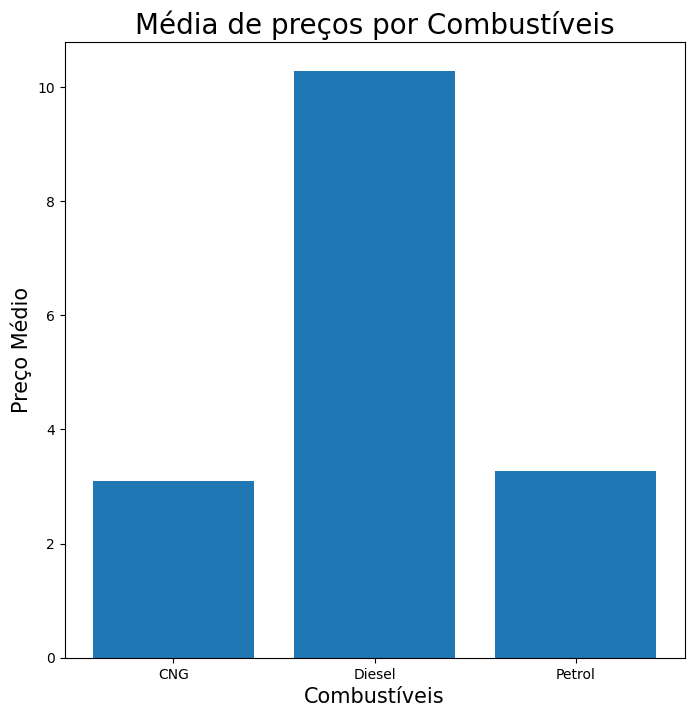

In [11]:
preco_comb = df["Selling_Price"].groupby(df["Fuel_Type"]).mean()

plt.figure(figsize=(8,8))
plt.bar(preco_comb.index, preco_comb)
plt.title("Média de preços por Combustíveis", fontsize=20)
plt.xlabel("Combustíveis", fontsize=15)
plt.ylabel("Preço Médio", fontsize=15)
plt.show()

Vemos que os preços podem depender do combustível utilizado pelo carro, e além disso, a média de preços para CNG e Petrol são parecidas, sendo assim, seria uma alternativa trocar os poucos valores de CNG por Petrol.

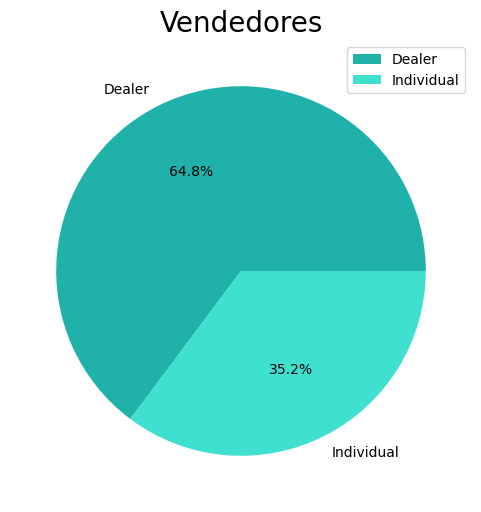

In [12]:
classes_seller = df["Seller_Type"].value_counts()
sellers = classes_seller.index

color = ["lightseagreen", "turquoise", "aquamarine"]


plt.figure(figsize=(6,6))
plt.pie(classes_seller, labels=sellers,autopct="%1.1f%%", colors=color)
plt.title("Vendedores", fontsize = 20)
plt.legend()
plt.show()

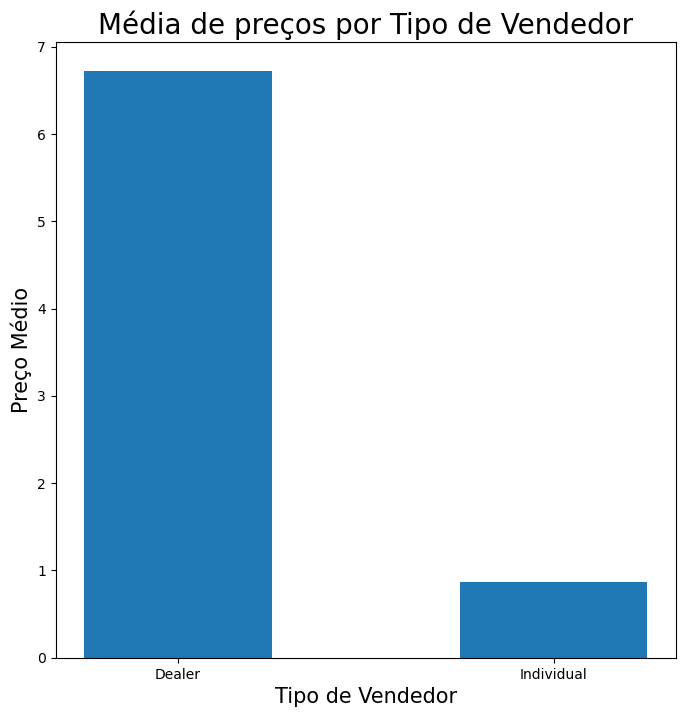

In [13]:
preco_seller = df["Selling_Price"].groupby(df["Seller_Type"]).mean()

plt.figure(figsize=(8,8))
plt.bar(preco_seller.index, preco_seller, width=[0.5, 0.5])
plt.title("Média de preços por Tipo de Vendedor", fontsize=20)
plt.xlabel("Tipo de Vendedor", fontsize=15)
plt.ylabel("Preço Médio", fontsize=15)
plt.show()

Observamos que o fato do carro estar sendo vendido por um distribuidor faz com que seu preço seja elevado, possivelmente é devido as taxas cobradas pelos distribuidores.

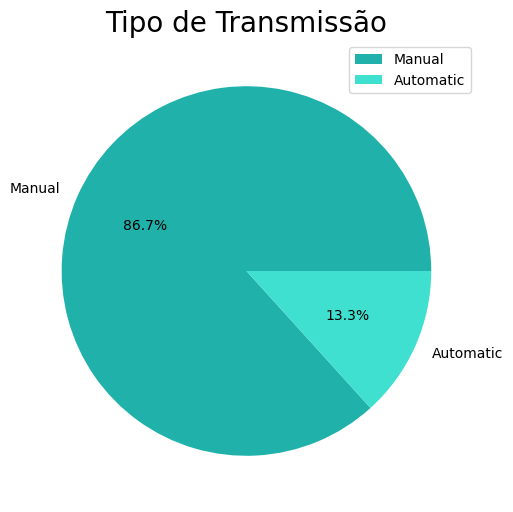

In [14]:
transmissao = df["Transmission"].value_counts()
tipo_transm = transmissao.index

color = ["lightseagreen", "turquoise", "aquamarine"]


plt.figure(figsize=(6,6))
plt.pie(transmissao, labels=tipo_transm,autopct="%1.1f%%", colors=color)
plt.title("Tipo de Transmissão", fontsize = 20)
plt.legend()
plt.show()

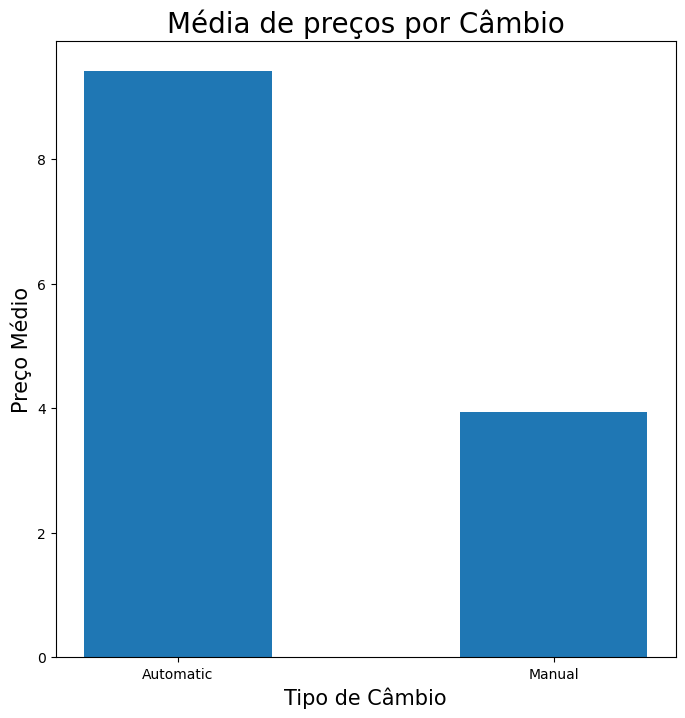

In [15]:
preco_transmissao = df["Selling_Price"].groupby(df["Transmission"]).mean()

plt.figure(figsize=(8,8))
plt.bar(preco_transmissao.index, preco_transmissao, width=[0.5, 0.5])
plt.title("Média de preços por Câmbio", fontsize=20)
plt.xlabel("Tipo de Câmbio", fontsize=15)
plt.ylabel("Preço Médio", fontsize=15)
plt.show()

Vemos que o tipo de câmbio também exerce influência direta no preço do carro.

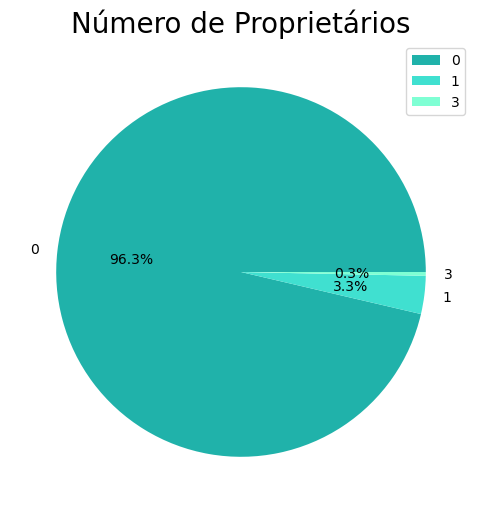

In [16]:
proprietario = df["Owner"].value_counts()
num_proprietario = proprietario.index

color = ["lightseagreen", "turquoise", "aquamarine"]


plt.figure(figsize=(6,6))
plt.pie(proprietario, labels=num_proprietario,autopct="%1.1f%%", colors=color)
plt.title("Número de Proprietários", fontsize = 20)
plt.legend()
plt.show()

Aqui temos o número de proprietários que o carro já teve, vemos que a grande maioria dos carros são novos.

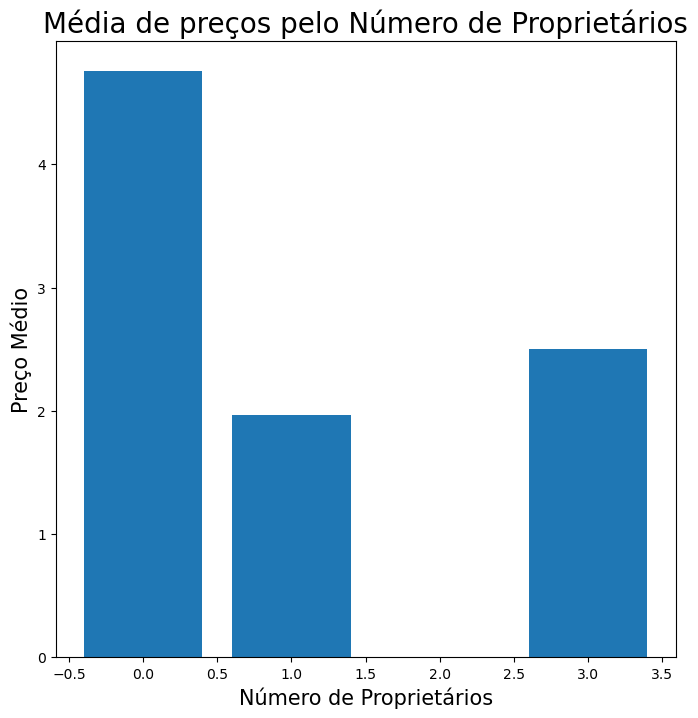

In [17]:
preco_proprietario = df["Selling_Price"].groupby(df["Owner"]).mean()

plt.figure(figsize=(8,8))
plt.bar(preco_proprietario.index, preco_proprietario)
plt.title("Média de preços pelo Número de Proprietários", fontsize=20)
plt.xlabel("Número de Proprietários", fontsize=15)
plt.ylabel("Preço Médio", fontsize=15)
plt.show()

Vemos que além dos número de carros com mais de 1 proprietário ser pequeno, a média de preços é parecida, desse modo, podemos organizar o data frame entre carros novos e carros usados.

## Tratamento 

Vamos realizar os tratamentos propostos acima.

Primeiramente, vamos excluir as colunas que não são importante a princípio para o modelo.

In [3]:
df = df.drop("Car_Name", axis=1)

Para a coluna do tipo de combustível, vamos juntar o CNG com o Petrol, e realizar o OneHotEncoder

In [4]:
df["Fuel_Type"] = df["Fuel_Type"].replace("CNG", "Petrol")

df = pd.get_dummies(df, columns=["Fuel_Type"])

In [5]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol
0,2014,3.35,5.59,27000,Dealer,Manual,0,0,1
1,2013,4.75,9.54,43000,Dealer,Manual,0,1,0
2,2017,7.25,9.85,6900,Dealer,Manual,0,0,1
3,2011,2.85,4.15,5200,Dealer,Manual,0,0,1
4,2014,4.60,6.87,42450,Dealer,Manual,0,1,0


Para as colunas de Transmissão e Tipo de Vendedor, vamos somente realizar o OneHotEncoder

In [5]:
df = pd.get_dummies(df, columns=["Transmission", "Seller_Type"])
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Seller_Type_Dealer,Seller_Type_Individual
0,2014,3.35,5.59,27000,0,0,1,0,1,1,0
1,2013,4.75,9.54,43000,0,1,0,0,1,1,0
2,2017,7.25,9.85,6900,0,0,1,0,1,1,0
3,2011,2.85,4.15,5200,0,0,1,0,1,1,0
4,2014,4.60,6.87,42450,0,1,0,0,1,1,0


Então, trasformamos a coluna Owner, em Novo para valores 0 e Usado para > 0.

In [6]:
Novo = []
Usado = []

for i in df["Owner"]:
    if i > 0:
        Novo.append(0)
        Usado.append(1)
    else:
        Novo.append(1)
        Usado.append(0)

df["Novo"] = Novo
df["Usado"] = Usado

df = df.drop("Owner", axis=1)

Para o tratamento da coluna da quilometragem, optamos por excluir a linha com valor próximo a 500000km, pois caracteriza-se como um outlier neste conjunto.

In [78]:
df = df[df["Kms_Driven"] < 400000]

Agora, para visualizar a correlação dos dados, vamos observar a matriz de correlação.

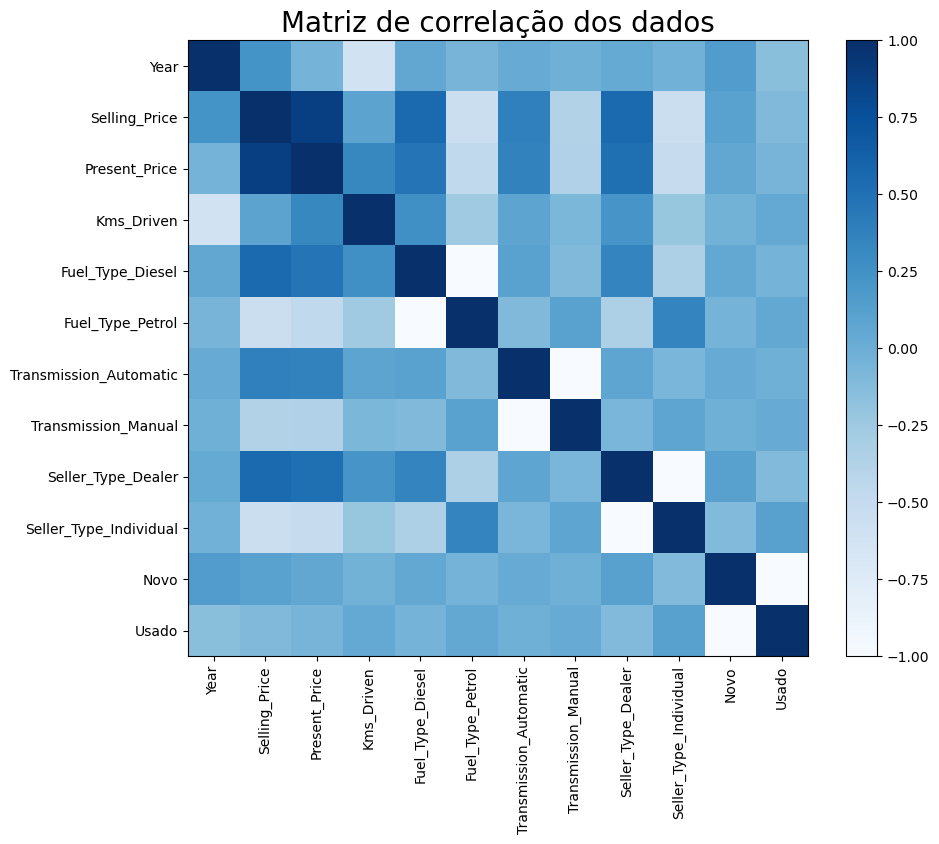

In [8]:
corr = df.corr()

plt.figure(figsize=(10,8))

plt.imshow(corr, cmap="Blues", interpolation="none", aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation="vertical")
plt.yticks(range(len(corr)), corr.columns)
plt.title("Matriz de correlação dos dados", fontsize=20)
plt.grid(False)
plt.show()


Observamos que a coluna de Preço Presente está muito correlacionada com a coluna de predição, isso pode causar um viés ao modelo, mas, apesar disso, esta informação é realmente acessível aos "pesquisadores" de preços de carros, então ficará presente no conjunto. 

In [8]:
Anos = df["Year"]
df["Ano"] = Anos
df = df.drop("Year", axis=1)
df.head()

df.to_csv("dados_tratados.csv", index=False)